In [1]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from tensorboard.backend.event_processing import event_accumulator
from collections import defaultdict
import matplotlib.ticker as ticker

Finding the best optimization values:

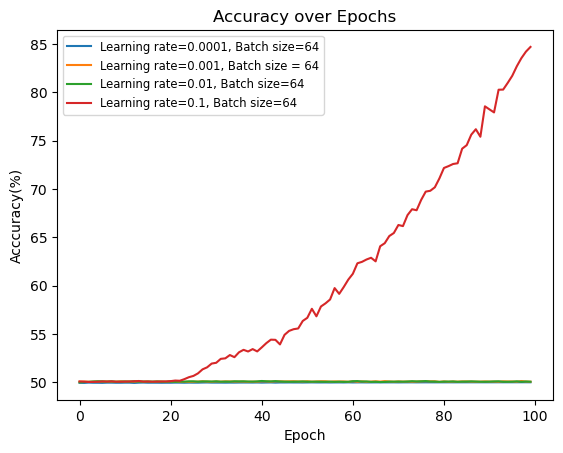

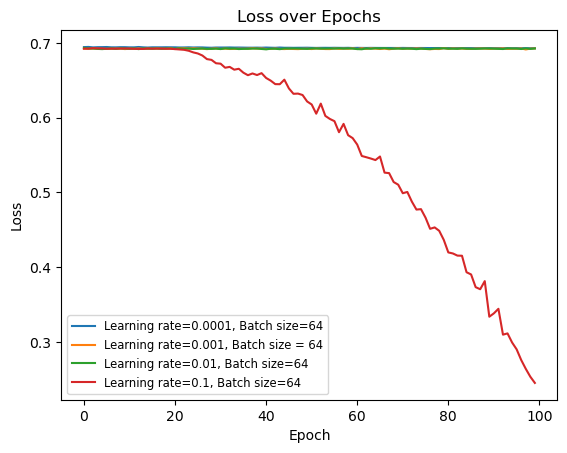

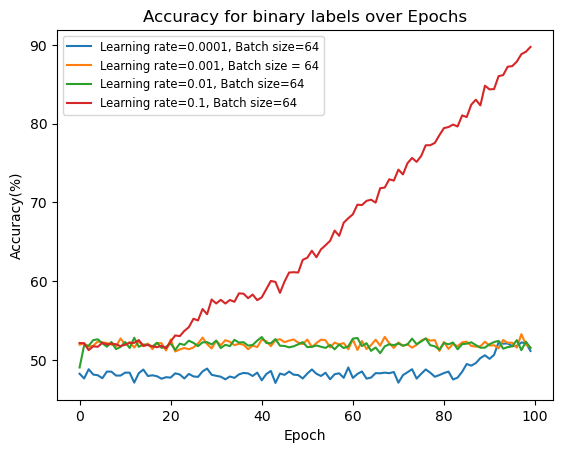

In [89]:
# Path to the main directory where all runs are stored
main_log_dir = r"A:\3rd_Year_Project\Project_code\runs\optimisation\Current"
# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')
target_tag = 'Accuracy'  # or 'Loss'

#plt.figure(figsize=(10, 6))

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.plot(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag} over Epochs')
plt.xlabel('Epoch')
plt.ylabel("Acccuracy(%)")
plt.legend(loc='best', fontsize='small')
#plt.grid(True)
#plt.tight_layout()
plt.show()

# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')
target_tag = 'Loss'  # or 'Loss'

#plt.figure(figsize=(10, 6))

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.plot(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag} over Epochs')
plt.xlabel('Epoch')
plt.ylabel(target_tag)
#plt.ylim(0.35, 0.6)
plt.legend(loc='best', fontsize='small')
#plt.grid(True)
#plt.tight_layout()
plt.show()

# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')
target_tag = 'Accuracy for binary labels'  # or 'Loss'

#plt.figure(figsize=(10, 6))

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.plot(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag} over Epochs')
plt.xlabel('Epoch')
plt.ylabel("Accuracy(%)")
#plt.ylim(74, 85)
plt.legend(loc='best', fontsize='small')
#plt.grid(True)
#plt.tight_layout()
plt.show()

Training curves

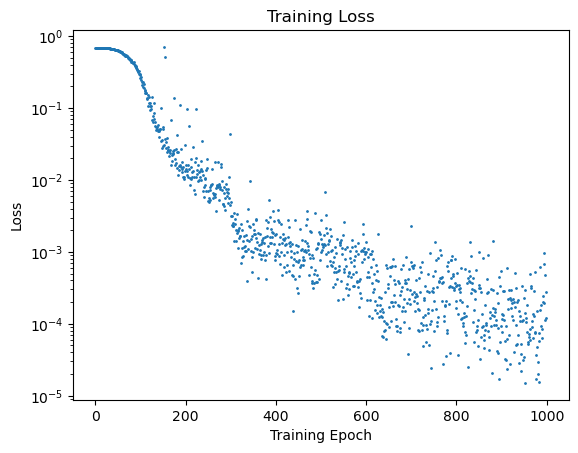

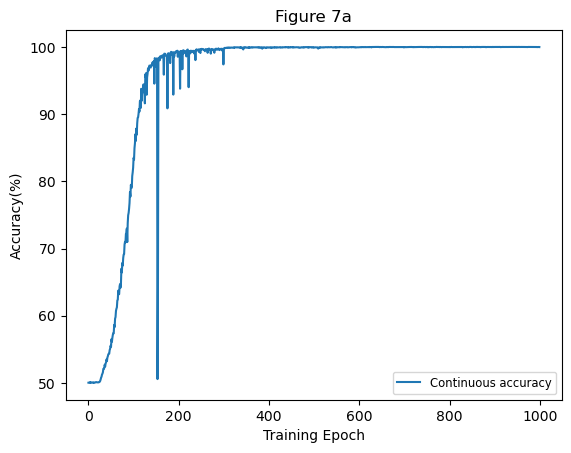

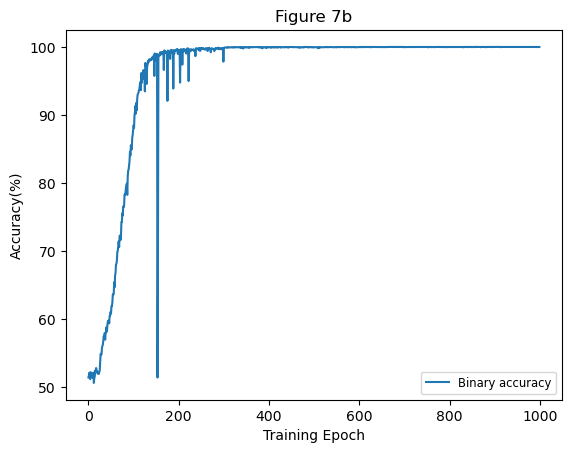

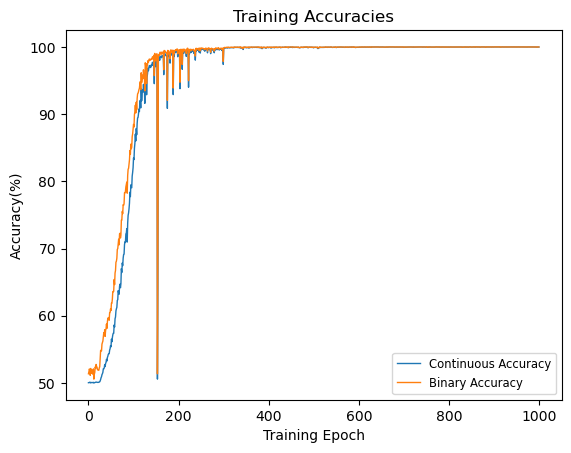

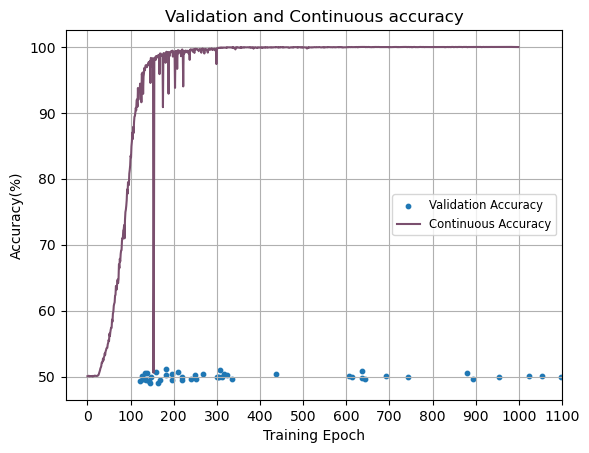

In [90]:
# Path to the main directory where all runs are stored
main_log_dir = (r"A:\3rd_Year_Project\Project_code\runs\Training")#\lr=0.1(300drop0.7), bs=64, TrainBinary-TrainBinary")
run_name = (r"lr=0.1(300drop0.7), bs=64, TrainBinary-TrainBinary")
# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')

#load in the actual page?
run_dir = os.path.join(main_log_dir, run_name)
ea = event_accumulator.EventAccumulator(run_dir)
ea.Reload()

#load in each of the subjects of interest
events = ea.Scalars("Accuracy")
steps50 = [e.step for e in events]
#   X-axis here
steps = np.array(steps50)
steps = steps[:1000]

#   Continuous accuracy
Acc = [e.value for e in events]
Acc = np.array(Acc)
Acc = Acc[:1000]

#   Loss
events = ea.Scalars("Loss")
hey_there = [e.value for e in events]
hey_there = np.array(hey_there)
hey_there = hey_there[:1000]

#   Binary Accuracy
events = ea.Scalars('Accuracy for binary labels')
values2 = [e.value for e in events]
values2 = np.array(values2)
values2 = values2[:1000]

#   validation accuracy
events = ea.Scalars('Validation Accuracy')
stepsVal = [e.step for e in events]
stepsVal = np.array(stepsVal)
stepsVal = stepsVal[:1000]
values = [e.value for e in events]
values = np.array(values)
values = values[:1000]

#Plot the graphs
#loss
plt.title("Training Loss")
plt.scatter(steps, hey_there, s=1)
plt.xlabel('Training Epoch')
plt.ylabel("Loss")
plt.yscale('log')
#plt.xlim(-50, 1050)
plt.show()
#Continuous accuracy
plt.plot(steps, Acc, label = "Continuous accuracy")
plt.title("Figure 7a")
plt.legend(loc='best', fontsize='small')
plt.xlabel('Training Epoch')
plt.ylabel("Accuracy(%)")
#plt.xlim(-50, 1050)
plt.show()
#Binary Accuracy
plt.plot(steps, values2, label = "Binary accuracy")
plt.title('Figure 7b')
plt.legend(loc='best', fontsize='small')
plt.xlabel('Training Epoch')
plt.ylabel('Accuracy(%)')
#plt.xlim(-50, 1050)
plt.show()

#both accuracies in one graph
plt.plot(steps, Acc, label="Continuous Accuracy", lw=1)
plt.plot(steps, values2, label="Binary Accuracy", lw=1)
plt.xlabel('Training Epoch')
plt.ylabel("Accuracy(%)")
plt.title("Training Accuracies")
plt.legend(loc='best', fontsize='small')
plt.xlim(-50, 1050)
plt.show()

#validation accuracy
#plt.plot(stepsVal, values)
plt.scatter(stepsVal, values, label = "Validation Accuracy", s=10)
plt.plot(steps, Acc, label="Continuous Accuracy", color="#7a4f6e")
plt.title(f'Validation and Continuous accuracy')
plt.xlabel('Training Epoch')
plt.ylabel("Accuracy(%)")
plt.xlim(-50, 1050)
plt.xticks(np.arange(0, len(steps50), 100))
plt.grid(True)
plt.legend(loc='best', fontsize='small')
plt.show()

Get combined graphs for the different runs

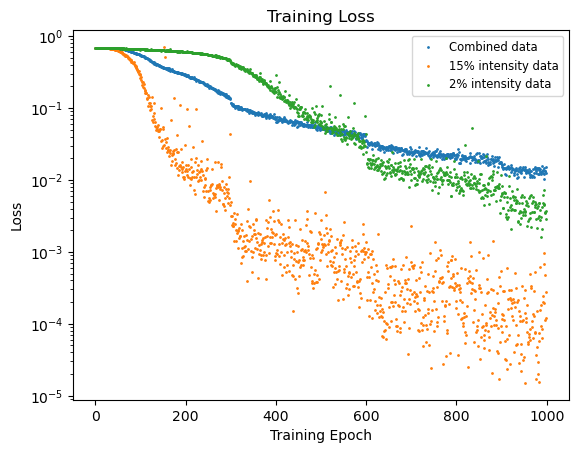

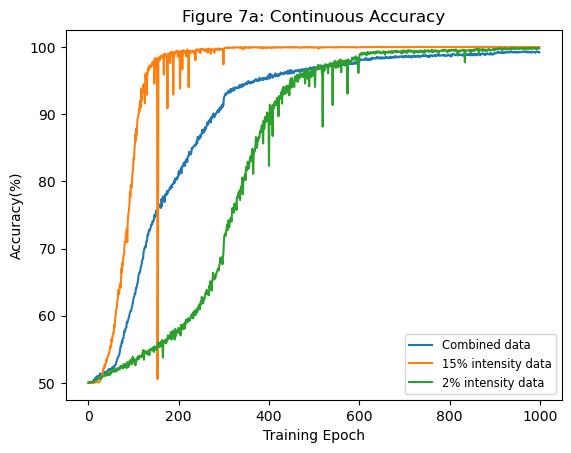

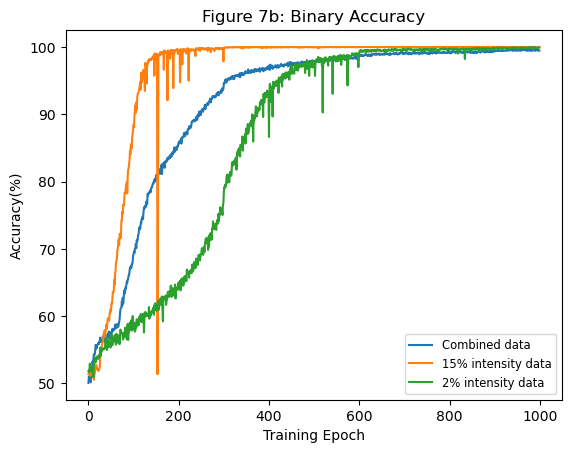

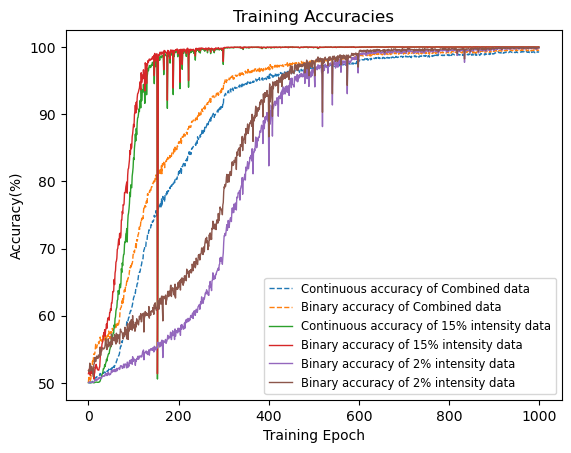

In [91]:
# Path to the main directory where all runs are stored
main_log_dir = (r"A:\3rd_Year_Project\Project_code\runs\Training")#\lr=0.1(300drop0.7), bs=64, TrainBinary-TrainBinary")
run_name = (r"lr=0.1(300drop0.7), bs=64, data combined")
# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')

#load in the actual page?
run_dir = os.path.join(main_log_dir, run_name)
ea = event_accumulator.EventAccumulator(run_dir)
ea.Reload()

#load in each of the subjects of interest
#x-axis on previous cell
#   Continuous accuracy
events = ea.Scalars("Accuracy")
Acc25 = [e.value for e in events]
Acc25 = np.array(Acc25)
Acc25 = Acc25[:1000]

#   Loss
events = ea.Scalars("Loss")
hey_there12 = [e.value for e in events]
hey_there12 = np.array(hey_there12)
hey_there12 = hey_there12[:1000]

#   Binary Accuracy
events = ea.Scalars('Accuracy for binary labels')
values22 = [e.value for e in events]
values22 = np.array(values22)
values22 = values22[:1000]



# Path to the main directory where all runs are stored
main_log_dir = (r"runs/Training")#\lr=0.1(300drop0.7), bs=64, TrainBinary-TrainBinary")
run_name = (r"lr=0.2(300drop0.7), bs=64, 2nd-2nd")
# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')

#load in the actual page?
run_dir = os.path.join(main_log_dir, run_name)
ea = event_accumulator.EventAccumulator(run_dir)
ea.Reload()

#load in each of the subjects of interest
#x-axis on previous cell
#   Continuous accuracy
events = ea.Scalars("Accuracy")
Acc60 = [e.value for e in events]
Acc60 = np.array(Acc60)
Acc60 = Acc60[:1000]

#   Loss
events = ea.Scalars("Loss")
hey_there60 = [e.value for e in events]
hey_there60 = np.array(hey_there60)
hey_there60 = hey_there60[:1000]

#   Binary Accuracy
events = ea.Scalars('Accuracy for binary labels')
values60 = [e.value for e in events]
values60 = np.array(values60)
values60 = values60[:1000]



#Plot the graphs
#loss
plt.title("Training Loss")
plt.scatter(steps, hey_there12, s=1, label="Combined data")
plt.scatter(steps, hey_there, s=1, label="15% intensity data")
plt.scatter(steps, hey_there60, s=1, label="2% intensity data")
plt.legend(loc='best', fontsize='small')
plt.xlabel('Training Epoch')
plt.ylabel("Loss")
plt.yscale('log')
#plt.xlim(-50, 1050)
plt.show()
#Continuous accuracy
plt.plot(steps, Acc25, label = "Combined data")
plt.plot(steps, Acc, label = "15% intensity data")
plt.plot(steps, Acc60, label = "2% intensity data")
plt.title("Figure 7a: Continuous Accuracy")
plt.legend(loc='best', fontsize='small')
plt.xlabel('Training Epoch')
plt.ylabel("Accuracy(%)")
#plt.xlim(-50, 1050)
plt.show()
#Binary Accuracy
plt.plot(steps, values22, label = "Combined data")
plt.plot(steps, values2, label = "15% intensity data")
plt.plot(steps, values60, label = "2% intensity data")
plt.title('Figure 7b: Binary Accuracy')
plt.legend(loc='best', fontsize='small')
plt.xlabel('Training Epoch')
plt.ylabel('Accuracy(%)')
#plt.xlim(-50, 1050)
plt.show()

#both accuracies in one graph
plt.plot(steps, Acc25, label="Continuous accuracy of Combined data", lw=1,linestyle='--')
plt.plot(steps, values22, label="Binary accuracy of Combined data", lw=1, linestyle='--')
plt.plot(steps, Acc, label="Continuous accuracy of 15% intensity data", lw=1)
plt.plot(steps, values2, label="Binary accuracy of 15% intensity data", lw=1)
plt.plot(steps, Acc60, label="Binary accuracy of 2% intensity data", lw=1)
plt.plot(steps, values60, label="Binary accuracy of 2% intensity data", lw=1)
plt.xlabel('Training Epoch')
plt.ylabel("Accuracy(%)")
plt.title("Training Accuracies")
plt.legend(loc='best', fontsize='small')
plt.xlim(-50, 1050)
plt.show()

Accuracy per framenumber

['frameNumber', 'Accuracy', 'stdAcc', 'Loss', 'LossStd']
31 31 31
<class 'list'> (31,)
<class 'list'> (31,)
<class 'list'> (31,)


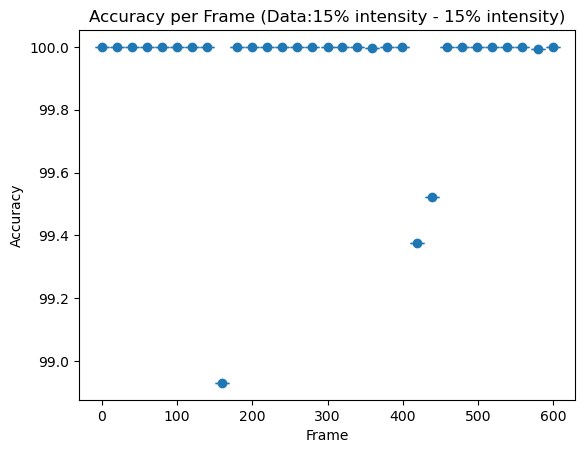

In [12]:
#Getting the graphs from the
framenumber_file = np.load("Acc_per_frame_CNN=15.npzAlmost, Data=trainBinary-trainBinary, Iterations=100.npz")
print(framenumber_file.files)

framenumber = framenumber_file["frameNumber"]
sorted_framenumber = np.argsort(framenumber) #tells different elements in framenumber to go to different indexes such that framenumebr is ascending
framenumber = framenumber[sorted_framenumber]
accuracy = framenumber_file["Accuracy"]
accuracy = accuracy[sorted_framenumber]
stdAcc = framenumber_file["stdAcc"]
stdAcc = stdAcc[sorted_framenumber]
#loss = framenumber_file["Loss"]
#loss = loss[sorted_framenumber]
#lossstd = framenumber_file["LossStd"]
#lossstd = lossstd[sorted_framenumber]#reorder all of the others such that they are all perfectly aligned to framenumber

#sorted_stdAcc = np.argsort(stdAcc)
#stdAcc1 = stdAcc[sorted_stdAcc]
#print(stdAcc1)

no_of_bins = 30
max_frame = np.max(framenumber)
no_needed = max_frame/(no_of_bins)
binned_framenumber = np.round((np.round(framenumber/no_needed))*no_needed)
#print(binned_framenumber)

#we want a_ce first # a_ce = np.sum(wi), wi = 1/(error^2)
grouped_bins = defaultdict(list)

#get the grouped bins for the errors
for key, value in zip(binned_framenumber, stdAcc):
    grouped_bins[key].append(value)

grouped_bins1 = defaultdict(list)

#get the grouped bins for the accuracy
for key, value, std in zip(binned_framenumber, accuracy, stdAcc):
    grouped_bins1[key].append(value)

bin_value = []
a_ce_list = []
x_ce_list = []

#now to find the correct x_ce value
for key in grouped_bins1:
    #find a_ce
    wi_list = []
    for error in grouped_bins[key]:
        if error == 0:
            error = 0.00000001

        wi = 1/((error)**2)

        wi_list.append(wi)

    wi_sum = np.sum(wi_list)
    a_ce = (1/wi_sum)**0.5

    bin_value.append(key)
    a_ce_list.append(a_ce)

    #find x_ce
    xi_list = []
    for accuracy in grouped_bins1[key]:
        xi = accuracy
        xi_list.append(xi)

    xiwi_list = []
    for i in range(len(xi_list)):
        xiwi = xi_list[i] * wi_list[i]
        xiwi_list.append(xiwi)

    sum_xiwi = np.sum(xiwi_list)

    x_ce = sum_xiwi/wi_sum
    x_ce_list.append(x_ce)

print(len(bin_value), len(x_ce_list), len(a_ce_list))
print(type(bin_value), np.shape(bin_value))
print(type(x_ce_list), np.shape(x_ce_list))
print(type(a_ce_list), np.shape(a_ce_list))

bin_value = np.array(bin_value).flatten()
x_ce_list = np.array(x_ce_list).flatten()
a_ce_list = np.array(a_ce_list).flatten()

plt.title(f'Accuracy per Frame (Data:15% intensity - 15% intensity)')
plt.xlabel('Frame')
plt.ylabel("Accuracy")
#plt.xlim(0, 300)
#plt.ylim(99.9998, 100.00001)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False, useMathText=False)) # turns off y-axis scientific notation scale
plt.errorbar(bin_value, x_ce_list, yerr=a_ce_list, linestyle="None", capsize=5)#, ecolor="#1f77b4", label="Error of the mean")
#plt.errorbar(bin_frame, meanAcc, yerr=stdAcc1, linestyle="None", ecolor="red", capsize=5, label="Error of the standard deviations")
plt.scatter(bin_value, x_ce_list)#, color="#7a4f6e")
#plt.legend()
plt.show()